In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
from pprint import pprint
import dash
from dash import dcc, html
from dash.dependencies import Input, Output


In [2]:
file_path = 'cleaned_globalterrorismdb_0718dist.csv'

df_terr = pd.read_csv(file_path, dtype={'iyear': str, 'imonth': str, 'latitude': str, 'longitude': str, 'number_of_kills': 'int64', 'number_of_wounds': 'int64'})
df_terr.head()


,iyear,imonth,country_name,extended,success,suicide,region,city,latitude,longitude,attack_type,target_type,nationality_of_target,group_name,number_of_kills,number_of_wounds,weapon_type
0,1970,1,United States,0,1,0,North America,Cairo,37.005105,-89.176269,Armed Assault,Police,United States,Black Nationalists,0,0,Firearms
1,1970,1,Uruguay,0,0,0,South America,Montevideo,-34.891151,-56.187214,Assassination,Police,Uruguay,Tupamaros (Uruguay),0,0,Firearms
2,1970,1,United States,0,1,0,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,Utilities,United States,Unknown,0,0,Explosives
3,1970,1,United States,0,1,0,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,Military,United States,New Year's Gang,0,0,Incendiary
4,1970,1,United States,0,1,0,North America,Madison,43.07295,-89.386694,Facility/Infrastructure Attack,Government (General),United States,New Year's Gang,0,0,Incendiary


In [3]:
df_terr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128838 entries, 0 to 128837
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   iyear                  128838 non-null  object
 1   imonth                 128838 non-null  object
 2   country_name           128838 non-null  object
 3   extended               128838 non-null  int64 
 4   success                128838 non-null  int64 
 5   suicide                128838 non-null  int64 
 6   region                 128838 non-null  object
 7   city                   128838 non-null  object
 8   latitude               128838 non-null  object
 9   longitude              128838 non-null  object
 10  attack_type            128838 non-null  object
 11  target_type            128838 non-null  object
 12  nationality_of_target  128838 non-null  object
 13  group_name             128838 non-null  object
 14  number_of_kills        128838 non-null  int64 
 15  

In [4]:
df_terr.columns

Index(['iyear', 'imonth', 'country_name', 'extended', 'success', 'suicide',
       'region', 'city', 'latitude', 'longitude', 'attack_type', 'target_type',
       'nationality_of_target', 'group_name', 'number_of_kills',
       'number_of_wounds', 'weapon_type'],
      dtype='object')

In [5]:
df_terr.describe()

,extended,success,suicide,number_of_kills,number_of_wounds
count,128838.000000,128838.000000,128838.000000,128838.000000,128838.000000
mean,0.022734,0.900255,0.042713,2.215177,3.706515
std,0.149055,0.299661,0.202209,10.273461,40.576605
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,2.000000,2.000000
max,1.000000,1.000000,1.000000,1384.000000,8191.000000


In [6]:
# We have two numkerical columns in the dataset (i.e. number_of_kills and number_of_wounds)
# Calculate mean, median, and standard deviation for numeric columns

# Select numeric columns
numeric_cols = ['number_of_kills', 'number_of_wounds']

# Calculate mean, median, and standard deviation for numeric columns
mean_values = np.mean(df_terr[numeric_cols], axis=0)
median_values = np.median(df_terr[numeric_cols], axis=0)
std_dev_values = np.std(df_terr[numeric_cols], axis=0)

pprint("Mean values")
pprint(mean_values)
pprint("Median values")
pprint(median_values)
pprint("Standard Deviation values")
pprint(std_dev_values)

'Mean values'
number_of_kills     2.215177
number_of_wounds    3.706515
dtype: float64
'Median values'
array([0., 0.])
'Standard Deviation values'
number_of_kills     10.273422
number_of_wounds    40.576448
dtype: float64


In [7]:
# Select categorical columns
categorical_cols = df_terr.select_dtypes(include=['object']).columns

most_frequent_values = {}

# Identify the most frequent values in categorical columns
for col in categorical_cols:
    values, counts = np.unique(df_terr[col], return_counts=True)
    most_frequent_value = values[np.argmax(counts)]
    most_frequent_values[col] = most_frequent_value

pprint("Most frequent values in categorical columns:")
pprint(most_frequent_values)

'Most frequent values in categorical columns:'
{'attack_type': 'Bombing/Explosion',
 'city': 'Baghdad',
 'country_name': 'Iraq',
 'group_name': 'Unknown',
 'imonth': '5',
 'iyear': '2014',
 'latitude': '33.303566',
 'longitude': '44.371773',
 'nationality_of_target': 'Iraq',
 'region': 'Middle East & North Africa',
 'target_type': 'Private Citizens & Property',
 'weapon_type': 'Explosives'}


In [8]:
# since the highest group is unknown, we will look for the second highest group
# Select the second most frequent value in the 'group_name' column
values, counts = np.unique(df_terr['group_name'], return_counts=True)
second_most_frequent_value = values[np.argsort(counts)[-2]]
print("Second most frequent value in the 'group_name' column:", second_most_frequent_value)

Second most frequent value in the 'group_name' column: Taliban


In [9]:
# Group by year and calculate aggregate statistics for nkill and nwound
agg_stats = df_terr.groupby('iyear')[['number_of_kills', 'number_of_wounds']].agg(['mean', 'sum'])
pprint("Aggregate statistics by year:")
agg_stats


'Aggregate statistics by year:'


number_of_kills        number_of_wounds       
                 mean    sum             mean    sum
iyear                                               
1970         0.198830    102         0.405458    208
1971         0.102113     29         0.278169     79
1972         1.018987    161         2.531646    400
1973         0.582915    116         2.477387    493
1974         0.884477    245         3.039711    842
1975         0.552239    185         1.710448    573
1976         0.677228    342         1.386139    700
1977         0.228273    197         0.497103    429
1978         1.025515   1045         1.355250   1381
1979         0.842140   1275         1.358653   2057
1980         2.103275   3340         1.930730   3066
1981         2.378566   3418         2.065414   2968
1982         2.506633   3023         2.539801   3063
1983         3.981604   5411         2.526858   3434
1984         3.458721   6326         2.243302   4103
1985         3.344315   5177         2.833333   4386
1986         1.779672   2714         3.041967   4639
1987         2.407125   4730         2.475318   4864
1988         1.966773   5564         2.100389   5942
1989         2.053903   6973         1.463918   4970
1990         2.024474   5873         1.852809   5375
1991         2.088809   6962         1.960696   6535
1992         1.962865   7400         2.326525   8771
1994         2.423411   5300         2.657522   5812
1995         2.080610   3820         6.676471  12258
1996         2.140234   3846         4.769616   8571
1997         3.485057   6064         3.542529   6164
1998         3.401471   2313        11.508824   7826
1999         1.966512   2114         4.407442   4738
2000         2.097301   2953         3.779119   5321
2001         3.946633   6212        14.207116  22362
2002         2.519964   2777         6.161525   6790
2003         2.424038   2521         6.715385   6984
2004         5.008677   4618        12.682213  11693
2005         3.039497   5079         7.294434  12189
2006         3.410545   7568         6.708878  14887
2007         4.023929  10426         8.439599  21867
2008         1.986633   7877         4.524086  17938
2009         1.779221   7124         4.471778  17905
2010         1.656795   6937         3.657034  15312
2011         1.659760   7049         3.183188  13519
2012         1.781232  12490         3.428123  24038
2013         1.878218  18168         3.662463  35427
2014         1.991731  24086         3.152237  38120
2015         2.271174  24054         3.737607  39585
2016         2.472477  22952         3.919207  36382
2017         2.430228  18443         2.974568  22574

In [10]:
# Number of attacks per year
attacks_per_year = df_terr['iyear'].value_counts().sort_index()
pprint("Number of attacks per year:")
attacks_per_year

'Number of attacks per year:'


iyear
1970      513
1971      284
1972      158
1973      199
1974      277
1975      335
1976      505
1977      863
1978     1019
1979     1514
1980     1588
1981     1437
1982     1206
1983     1359
1984     1829
1985     1548
1986     1525
1987     1965
1988     2829
1989     3395
1990     2901
1991     3333
1992     3770
1994     2187
1995     1836
1996     1797
1997     1740
1998      680
1999     1075
2000     1408
2001     1574
2002     1102
2003     1040
2004      922
2005     1671
2006     2219
2007     2591
2008     3965
2009     4004
2010     4187
2011     4247
2012     7012
2013     9673
2014    12093
2015    10591
2016     9283
2017     7589
Name: count, dtype: int64

In [11]:
top_five_years = attacks_per_year.nlargest(5)

print("\nTop five years with the highest number of attacks:")
print(top_five_years)


Top five years with the highest number of attacks:
iyear
2014    12093
2015    10591
2013     9673
2016     9283
2017     7589
Name: count, dtype: int64


In [12]:
# Most affected regions
affected_regions = df_terr['region'].value_counts()
pprint("Most affected regions:")
affected_regions.head()

'Most affected regions:'


region
Middle East & North Africa    37682
South Asia                    34251
South America                 11644
Sub-Saharan Africa            11125
Western Europe                11116
Name: count, dtype: int64

In [13]:
# Most affected countries
affected_countries = df_terr['country_name'].value_counts()
pprint("Most affected countries:")
affected_countries.head()

'Most affected countries:'


country_name
Iraq           19630
Pakistan       11745
India           9198
Afghanistan     8849
Philippines     5222
Name: count, dtype: int64

In [14]:
# Most common attack types
common_attack_types = df_terr['attack_type'].value_counts()
pprint("Most common attack types:")
common_attack_types.head()

'Most common attack types:'


attack_type
Bombing/Explosion                 66966
Armed Assault                     33443
Assassination                     14967
Facility/Infrastructure Attack     7456
Hostage Taking (Kidnapping)        4215
Name: count, dtype: int64

In [15]:
# Most common targets
common_targets = df_terr['target_type'].value_counts()
pprint("Most common targets:")
common_targets.head()

'Most common targets:'


target_type
Private Citizens & Property    31188
Police                         19702
Military                       19372
Government (General)           16639
Business                       14630
Name: count, dtype: int64

# Data Vizulazation

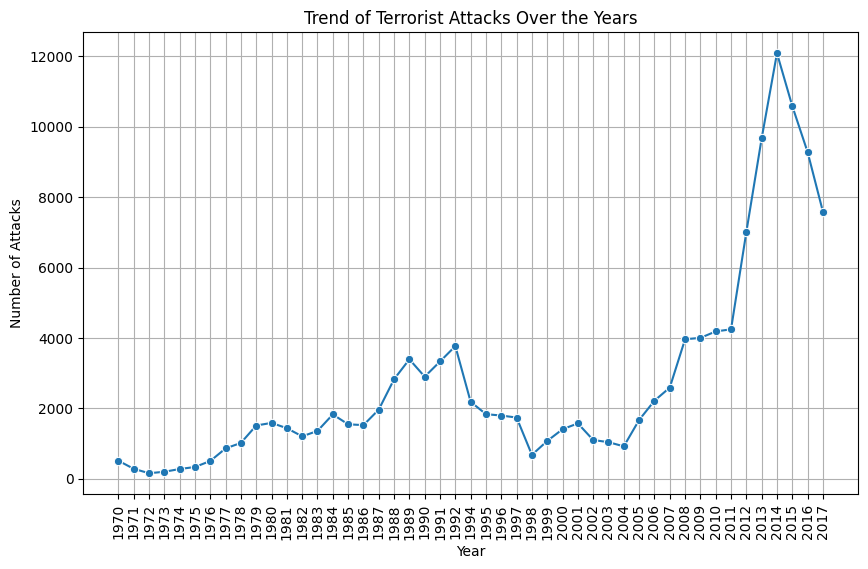

In [16]:
# Number of attacks per year
attacks_per_year = df_terr['iyear'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, marker='o')
plt.title('Trend of Terrorist Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


C:\Users\ahmed\AppData\Local\Temp\ipykernel_19304\5377209.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attacks_by_region.index, y=attacks_by_region.values, palette='viridis')


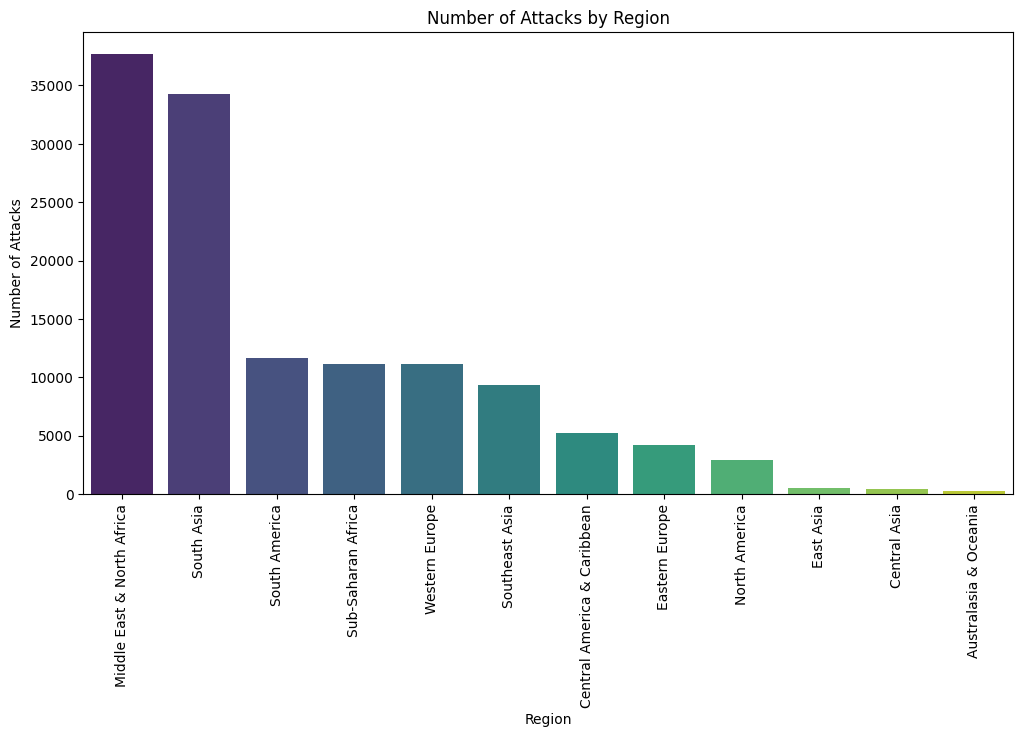

In [17]:
# Number of attacks by region
attacks_by_region = df_terr['region'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=attacks_by_region.index, y=attacks_by_region.values, palette='viridis')
plt.title('Number of Attacks by Region')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()



C:\Users\ahmed\AppData\Local\Temp\ipykernel_19304\886295241.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attacks_by_country.index, y=attacks_by_country.values, palette='viridis')


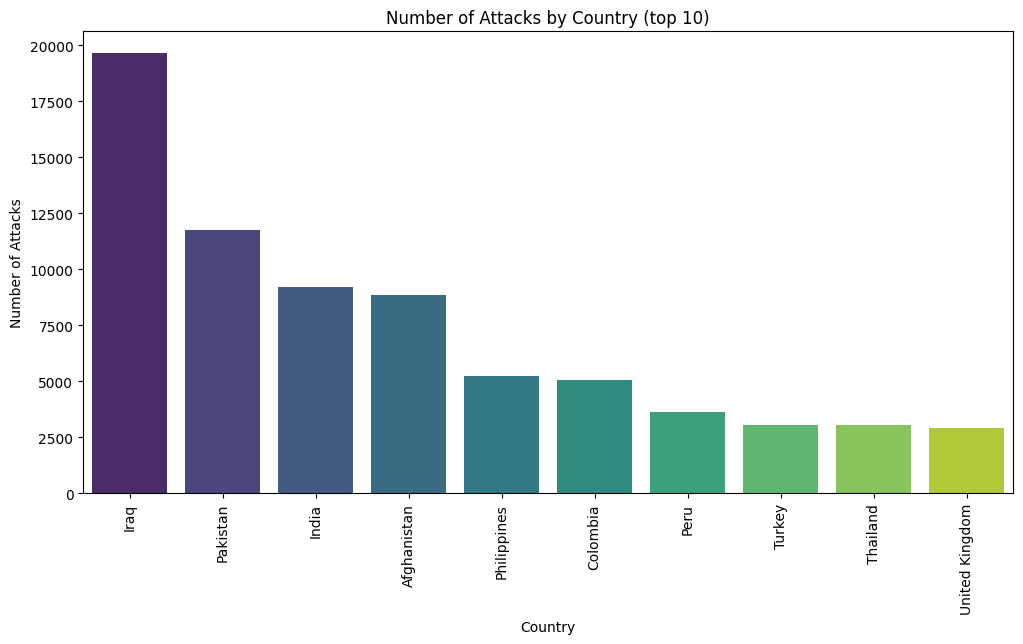

In [18]:
# Number of attacks by country (top 10)
top_n = 10
attacks_by_country = df_terr['country_name'].value_counts().head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(x=attacks_by_country.index, y=attacks_by_country.values, palette='viridis')
plt.title('Number of Attacks by Country (top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

In [19]:
df_terr.columns


Index(['iyear', 'imonth', 'country_name', 'extended', 'success', 'suicide',
       'region', 'city', 'latitude', 'longitude', 'attack_type', 'target_type',
       'nationality_of_target', 'group_name', 'number_of_kills',
       'number_of_wounds', 'weapon_type'],
      dtype='object')

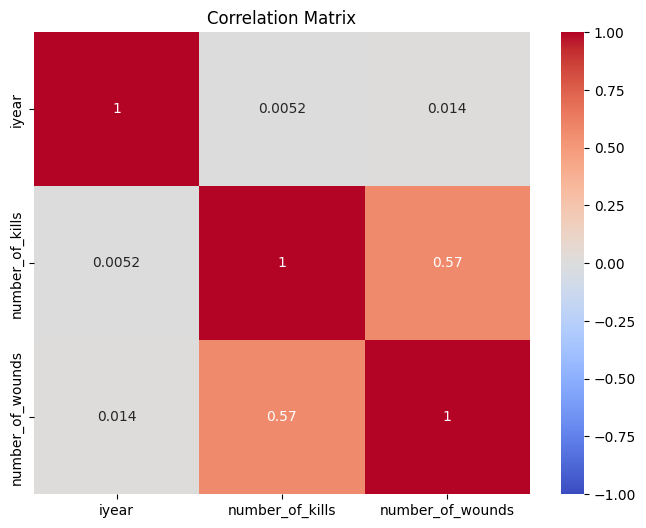

In [20]:
# Function to map month names to numbers to be able to use them in correlation
def map_months(df, month_col):
    month_map = {
        'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
        'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
    }
    df[month_col] = df[month_col].map(month_map)
    return df

# Apply the function to the DataFrame
df_terr = map_months(df_terr, 'imonth')

# Select relevant columns
cols_to_corr = ['iyear', 'number_of_kills', 'number_of_wounds']

# Calculate correlation matrix
corr_matrix = df_terr[cols_to_corr].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

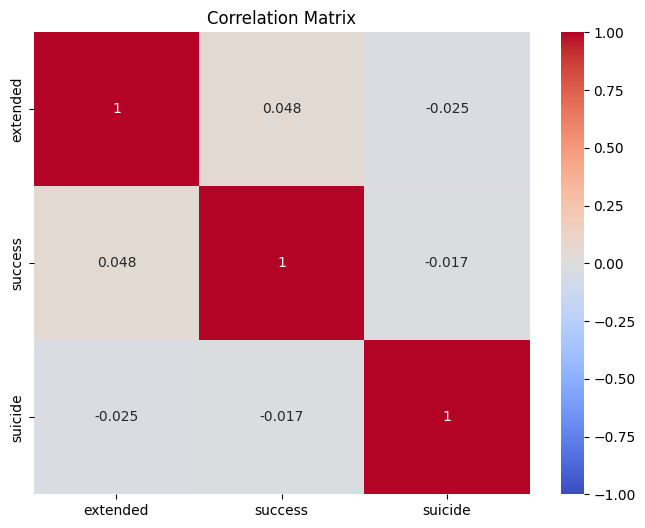

In [21]:

# Select relevant columns
cols_to_corr = ['extended', 'success', 'suicide']

# Calculate correlation matrix
corr_matrix = df_terr[cols_to_corr].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

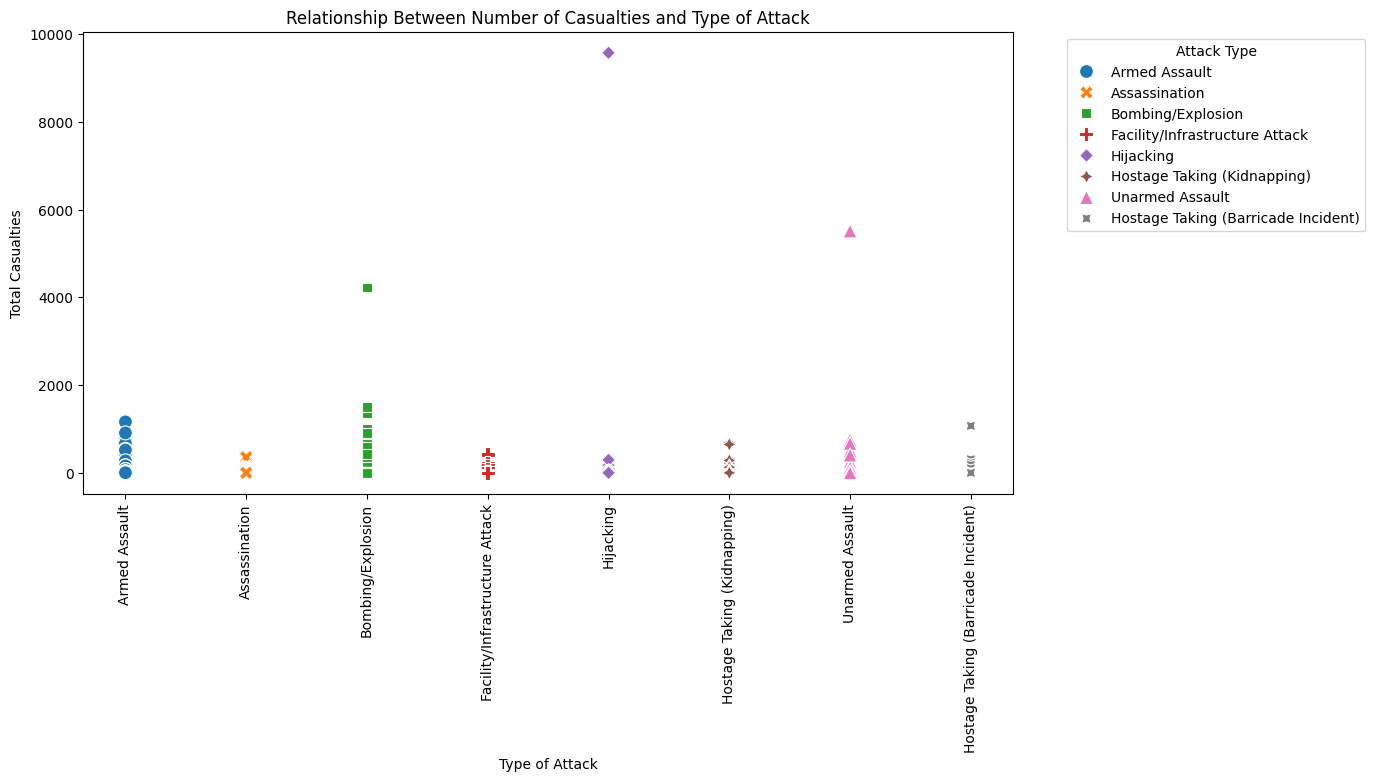

In [22]:
# Create a column for total casualties
df_terr['total_casualties'] = df_terr['number_of_kills'] + df_terr['number_of_wounds']

plt.figure(figsize=(12, 6))
sns.scatterplot(x='attack_type', y='total_casualties', data=df_terr, hue='attack_type', style='attack_type', s=100)
plt.title('Relationship Between Number of Casualties and Type of Attack')
plt.xlabel('Type of Attack')
plt.ylabel('Total Casualties')
plt.xticks(rotation=90)
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [23]:
# Initialize Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Geographic Distribution of Attacks Over Time"),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': 'Select All', 'value': 'All'}] +
                [{'label': country, 'value': country} for country in df_terr['country_name'].unique()],
        value='All',
        placeholder="Select a country"
    ),
    dcc.Graph(id='map-graph', style={'height': '800px'}),  # Increase the height of the map
    dcc.Interval(
        id='interval-component',
        interval=2*1000,  # in milliseconds
        n_intervals=0
    )
])

# Callback to update the map based on selected country and year
@app.callback(
    Output('map-graph', 'figure'),
    [Input('country-dropdown', 'value'),
     Input('interval-component', 'n_intervals')]
)
def update_map(selected_country, n_intervals):
    filtered_df = df_terr
    if selected_country != 'All':
        filtered_df = filtered_df[filtered_df['country_name'] == selected_country]
    
    fig = px.scatter_geo(filtered_df,
                         lat='latitude',
                         lon='longitude',
                         color='attack_type',
                         hover_name='country_name',
                         size='number_of_kills',
                         animation_frame='iyear',
                         projection='natural earth',
                         title='Geographic Distribution of Attacks Over Time')
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

In [24]:
# Initialize Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Time Series Plot of Terrorism Spread Over the Years"),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': 'Select All', 'value': 'All'}] +
                [{'label': country, 'value': country} for country in df_terr['country_name'].unique()],
        value='All',
        placeholder="Select a country"
    ),
    dcc.Graph(id='time-series-plot'),
])

# Callback to update the time series plot based on selected country
@app.callback(
    Output('time-series-plot', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_time_series(selected_country):
    filtered_df = df_terr
    if selected_country != 'All':
        filtered_df = filtered_df[filtered_df['country_name'] == selected_country]

    # Group data by year and calculate the sum of kills and wounds
    yearly_data = filtered_df.groupby('iyear').agg({'number_of_kills': 'sum', 'number_of_wounds': 'sum'}).reset_index()

    fig = px.line(yearly_data, 
                  x='iyear', 
                  y=['number_of_kills', 'number_of_wounds'], 
                  title='Time Series Plot of Terrorism Spread Over the Years')

    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Number of Incidents',
        xaxis_tickangle=-45,  # Rotate x-axis labels
        margin=dict(l=40, r=40, t=40, b=40)  # Adjust margins if necessary
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

In [25]:
# # Initialize Dash app
# app = dash.Dash(__name__)

# # Layout
# app.layout = html.Div([
#     html.H1("Geographic Distribution of Attacks Over Time"),
#     dcc.Dropdown(
#         id='country-dropdown',
#         options=[{'label': 'Select All', 'value': 'All'}] +
#                 [{'label': country, 'value': country} for country in df_terr['country_name'].unique()],
#         value='All',
#         placeholder="Select a country"
#     ),
#     dcc.Dropdown(
#         id='year-dropdown',
#         options=[{'label': 'Select All', 'value': 'All'}] +
#                 [{'label': str(year), 'value': year} for year in df_terr['iyear'].unique()],
#         value='All',
#         placeholder="Select a year"
#     ),
#     dcc.Graph(id='map-graph', style={'height': '800px'})  # Increase the height of the map
# ])

# # Callback to update the map based on selected country and year
# @app.callback(
#     Output('map-graph', 'figure'),
#     [Input('country-dropdown', 'value'),
#      Input('year-dropdown', 'value')]
# )
# def update_map(selected_country, selected_year):
#     filtered_df = df_terr
#     if selected_country != 'All':
#         filtered_df = filtered_df[filtered_df['country_name'] == selected_country]
#     if selected_year != 'All':
#         filtered_df = filtered_df[filtered_df['iyear'] == int(selected_year)]
    
#     fig = px.scatter_geo(filtered_df,
#                          lat='latitude',
#                          lon='longitude',
#                          color='attack_type',
#                          hover_name='country_name',
#                          size='number_of_kills',
#                          projection='natural earth',
#                          title='Geographic Distribution of Attacks Over Time')
    
#     return fig

# if __name__ == '__main__':
#     app.run_server(debug=True)